In [1]:
import numpy as np
import scipy as sc
import pandas as pd
from data.dataimport import dataimport
from models.conformal_nex import Conformal_nex
from models.conformal_nxg import Conformal_nxg
from models.conformal_std import Conformal_std
from models.forest_qr import RanForestQuantile
import matplotlib.pyplot as plt

In [2]:
# Import the data
inp_data, forecasts, measurements, fcdates = dataimport()

In [ ]:
conf_nex = Conformal_nex(0.99)
conf_nex.calibrate(inp_data[0],forecasts[0],measurements[0])
pred = np.empty((len(forecasts[1]),2))
for i in range(len(forecasts[1])):
    pred[i,:] = conf_nex.predict(inp_data[1][i,:],forecasts[1][i])
print(str(np.sum((np.squeeze(measurements[1]) > pred[:,0]) & (np.squeeze(measurements[1]) < pred[:,1]))/len(forecasts[1])))

In [ ]:
conf_std = Conformal_std()
conf_std.calibrate(inp_data[0],forecasts[0],measurements[0])
pred = np.empty((len(forecasts[1]),2))
for i in range(len(forecasts[1])):
    pred[i,:] = conf_std.predict(inp_data[1][i,:],forecasts[1][i])
print(str(np.sum((np.squeeze(measurements[1]) > pred[:,0]) & (np.squeeze(measurements[1]) < pred[:,1]))/len(forecasts[1])))

In [ ]:
conf_nxg = Conformal_nxg(0.98, 0.95, np.array([0.01, 0.01]), 2)
conf_nxg.calibrate(inp_data[0],forecasts[0],measurements[0])
pred = np.empty((len(forecasts[1]),2))
for i in range(len(forecasts[1])):
    pred[i,:] =conf_nxg.predict(inp_data[1][i,:],forecasts[1][i])
print(str(np.sum((np.squeeze(measurements[1]) > pred[:,0]) & (np.squeeze(measurements[1]) < pred[:,1]))/len(forecasts[1])))

In [ ]:
fqr = RanForestQuantile()
fqr.calibrate(inp_data[0],forecasts[0],measurements[0])
pred = np.empty((len(forecasts[1]),2))
for i in range(len(forecasts[1])):
    pred[i,:] =fqr.predict(inp_data[1][i,:],forecasts[1][i])
print(str(np.sum((np.squeeze(measurements[1]) > pred[:,0]) & (np.squeeze(measurements[1]) < pred[:,1]))/len(forecasts[1])))

In [ ]:
conf_nex = Conformal_nex(0.99)
conf_nex.calibrate(inp_data[0][:20],forecasts[0][:20],measurements[0][:20])
conf_nex.calibrate(inp_data[0][20:],forecasts[0][20:],measurements[0][20:])


In [3]:
from mod_tr_schedule import train_schedule

In [4]:
mod_params = [{'forget_factor':0.99}, {'forget_factor':0.98}, {'forget_factor':0.95}]
pred, mods = train_schedule(Conformal_nex, mod_params, inp_data[0], forecasts[0], measurements[0], inp_data[1], forecasts[1], measurements[1], num_splits=5, confidence=0.9)
print(np.sum((np.squeeze(measurements[1]) > pred[:,0]) & (np.squeeze(measurements[1]) < pred[:,1]))/len(measurements[1]))
print(np.mean(pred[:,1]-pred[:,0]))

0.9315068493150684
5.78650078185617


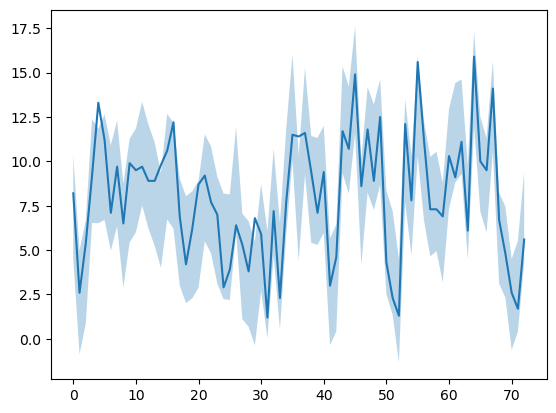

In [5]:
plt.plot(measurements[1])
plt.fill_between(range(len(measurements[1])),pred[:,0], y2 = pred[:,1], alpha = 0.3)

In [6]:
mod_params = [{'forget_factor':0.99, 'resid_factor':0.95, 'input_factor': np.array([0.01, 0.01]), 'num_input_vars':2}, {'forget_factor':0.98, 'resid_factor':0.95, 'input_factor': np.array([0.01, 0.01]),'num_input_vars':2}]
pred, mods = train_schedule(Conformal_nxg, mod_params, inp_data[0], forecasts[0], measurements[0], inp_data[1], forecasts[1], measurements[1], num_splits=5, confidence=0.9)
print(np.sum((np.squeeze(measurements[1]) > pred[:,0]) & (np.squeeze(measurements[1]) < pred[:,1]))/len(measurements[1]))
print(np.mean(pred[:,1]-pred[:,0]))

0.9315068493150684
5.806503435334734


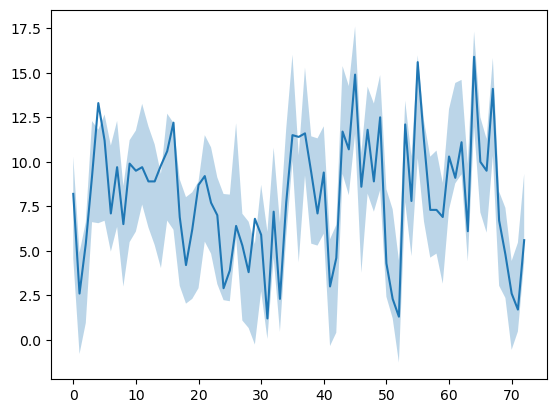

In [7]:
plt.plot(measurements[1])
plt.fill_between(range(len(measurements[1])),pred[:,0], y2 = pred[:,1], alpha = 0.3)

In [8]:
mod_params = [{'window_length':np.inf}, {'window_length':50}]
pred, mods = train_schedule(Conformal_std, mod_params, inp_data[0], forecasts[0], measurements[0], inp_data[1], forecasts[1], measurements[1], num_splits=5, confidence=0.9)
print(np.sum((np.squeeze(measurements[1]) > pred[:,0]) & (np.squeeze(measurements[1]) < pred[:,1]))/len(measurements[1]))
print(np.mean(pred[:,1]-pred[:,0]))

0.9041095890410958
6.661687751517007


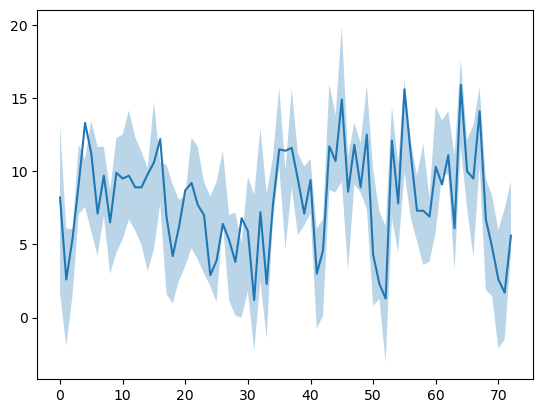

In [9]:
plt.plot(measurements[1])
plt.fill_between(range(len(measurements[1])),pred[:,0], y2 = pred[:,1], alpha = 0.3)

In [ ]:
mod_params = [{'num_trees':100,'window_length':np.inf}, {'num_trees':80,'window_length':50}]
pred, mods = train_schedule(RanForestQuantile, mod_params, inp_data[0], forecasts[0], measurements[0], inp_data[1], forecasts[1], measurements[1], num_splits=5, confidence=0.9)

In [ ]:
plt.plot(measurements[1])
plt.fill_between(range(len(measurements[1])),pred[:,0], y2 = pred[:,1], alpha = 0.3)

In [ ]:
print(np.sum((np.squeeze(measurements[1]) > pred[:,0]) & (np.squeeze(measurements[1]) < pred[:,1]))/len(measurements[1]))